In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

random_s = 101

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/renatomaaliw3/public_files/refs/heads/master/Data%20Sets/spiral_3.csv')
df.head(3)

,Feature_1,Feature_2,Label
0,-9.619615,-0.910204,0
1,11.305911,-8.889836,0
2,0.567677,6.113420,0


In [ ]:
reduced_df = df.drop('Label', axis = 1)
reduced_df.tail(3)

,Feature_1,Feature_2
747,-12.148540,-12.302063
748,-8.467792,-15.669910
749,2.313248,-18.931340


<Axes: xlabel='Feature_1', ylabel='Feature_2'>

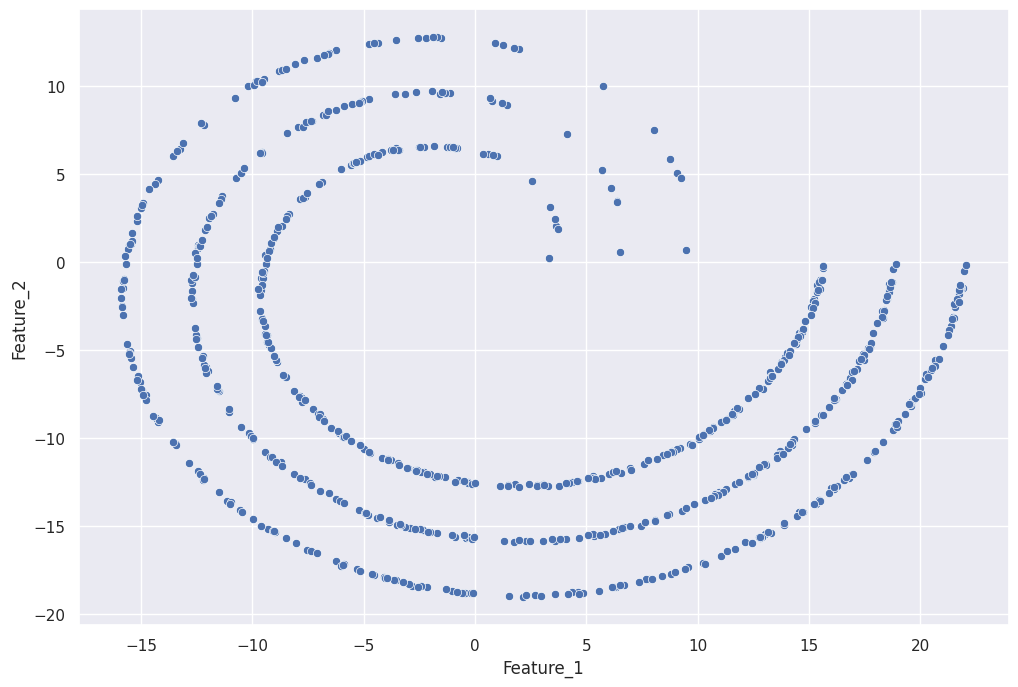

In [ ]:
sns.set(rc = {'figure.figsize': (12, 8)}) # Global Graph Size

sns.scatterplot(x = reduced_df['Feature_1'], y = reduced_df['Feature_2'])

In [ ]:
from sklearn.cluster import KMeans

# Apply K-Means clustering

kmeans = KMeans(n_clusters = 2, random_state = random_s)

reduced_df['KMeans Cluster'] = kmeans.fit_predict(reduced_df)
reduced_df.head(3)

,Feature_1,Feature_2,KMeans Cluster
0,-9.619615,-0.910204,0
1,11.305911,-8.889836,1
2,0.567677,6.113420,0


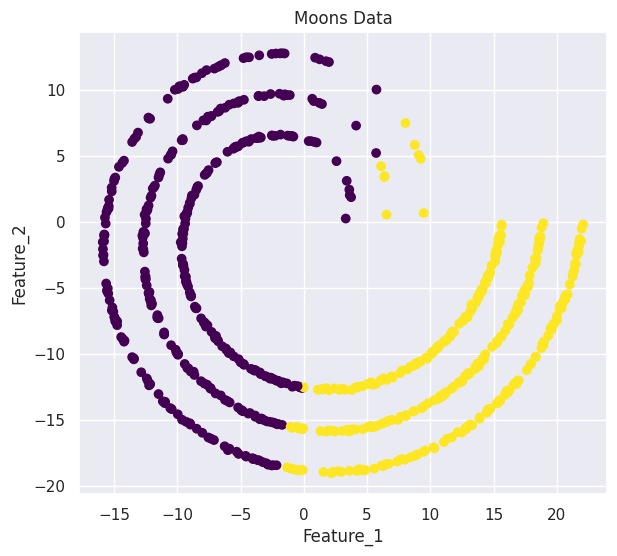

In [ ]:
# Plot K-Means results

plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.scatter(reduced_df['Feature_1'], reduced_df['Feature_2'], c = reduced_df['KMeans Cluster'], cmap = 'viridis')
plt.title('Moons Data')
plt.xlabel('Feature_1')
plt.ylabel('Feature_2')
plt.show()

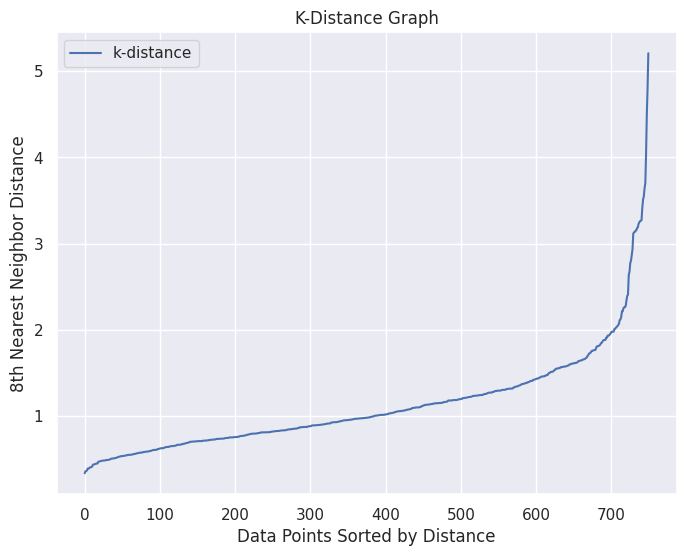

In [ ]:
from sklearn.neighbors import NearestNeighbors

# Compute the K-Nearest Neighbors distances for k = min_samples
# min_samples = 4 (From 2 dimensions or two variables multiplied by 2) - Not absolute but can be a guide

min_samples = 8 # number of neighbors to consider for each point.
                # A point that will be classified as a core point, if it is at least X neighbors within a given radius (eps)

neighbors = NearestNeighbors(n_neighbors = min_samples) # Find the nearest neighbors of a data point
neighbors_fit = neighbors.fit(reduced_df) # fits the NearestNeighbors to your dataset

distances, indices = neighbors_fit.kneighbors(reduced_df) # distances, a matrix where each row contains the distances to the nearest X neighbors for each data point
                                                          # indices, a matrix where each row contains the indices of the nearest 8 neighbors for each data poin

                                                          # In DBSCAN, the eps value determines the maximum distance two points can be considered as neighbors

# Sort the distances (use the k-th nearest neighbor distance for each point)

k_distances = np.sort(distances[:,-1]) # extracts the largest (farthest) distance frome each point to its min_samples-th nearest neighbors
                                       # this is important because a DBSCAN uses this distance to determine whether a point is a core point or not
                                       # sorts the distances to the min_samples-th nearest neighbor in ascending order.

                                       # By sorting the distances, you can see where there’s a sudden jump in the distances,
                                       # which usually indicates a good threshold (eps) for DBSCAN.

# Plot the k-distance graph

plt.figure(figsize = (8,6), facecolor = 'white')
plt.plot(k_distances, label = 'k-distance')
plt.title('K-Distance Graph')
plt.xlabel('Data Points Sorted by Distance')
plt.ylabel(f'{min_samples}th Nearest Neighbor Distance')
plt.grid(True)
plt.legend()
plt.show()

Based on KNN Graph, what do you think is the best epsilon value?

# 3.2

In [ ]:
k_distances

array([0.34046928, 0.36312289, 0.36651819, 0.37299986, 0.39449769,
       0.39511191, 0.39877172, 0.40812607, 0.40913585, 0.41108916,
       0.42083286, 0.43994243, 0.44163831, 0.44326203, 0.44898881,
       0.45012835, 0.45249643, 0.4538794 , 0.47215521, 0.47564647,
       0.47817809, 0.48115229, 0.48298471, 0.48573608, 0.48623864,
       0.48703223, 0.48703223, 0.48893515, 0.4911629 , 0.49374636,
       0.49385447, 0.49458193, 0.49616294, 0.50005187, 0.50246513,
       0.50847796, 0.5097168 , 0.51087941, 0.51114016, 0.51333368,
       0.51453764, 0.51779344, 0.5192955 , 0.5235254 , 0.5288731 ,
       0.53097184, 0.53134893, 0.53492811, 0.53765794, 0.53825589,
       0.53960778, 0.54027883, 0.54170241, 0.54260134, 0.54522126,
       0.54678999, 0.55011158, 0.55040375, 0.55319152, 0.55319152,
       0.55381291, 0.55519618, 0.55519618, 0.55705764, 0.55900297,
       0.56343842, 0.56356562, 0.56536886, 0.56684684, 0.57158663,
       0.57216116, 0.5743427 , 0.57549096, 0.5797717 , 0.57977

In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN

# Define range of potential eps values based on the k-distance plot

eps_values = np.linspace(0.2, 1.1, 10)

# Store S-Scores

s_scores = []

# Evaluate DBScan for each eps_values and calculate S-Score

for eps in eps_values:

  dbscan = DBSCAN(eps = eps, min_samples = min_samples)  # DBSCAN
  labels = dbscan.fit_predict(reduced_df)

  # Check if the clustering has more than 1 cluster to calculate S-Score
  if len(set(labels)) > 1:

    score = silhouette_score(reduced_df, labels)

  else:

    score = -1  # Invalid clustering scenario

  s_scores.append(score)

In [ ]:
s_scores

[-1,
 -1,
 -0.21604507204961956,
 -0.3937720412185507,
 -0.34387968920486633,
 -0.2198067427492716,
 -0.03302279474521159,
 0.03180077024466147,
 0.047384959337166244,
 0.0650350043119509]

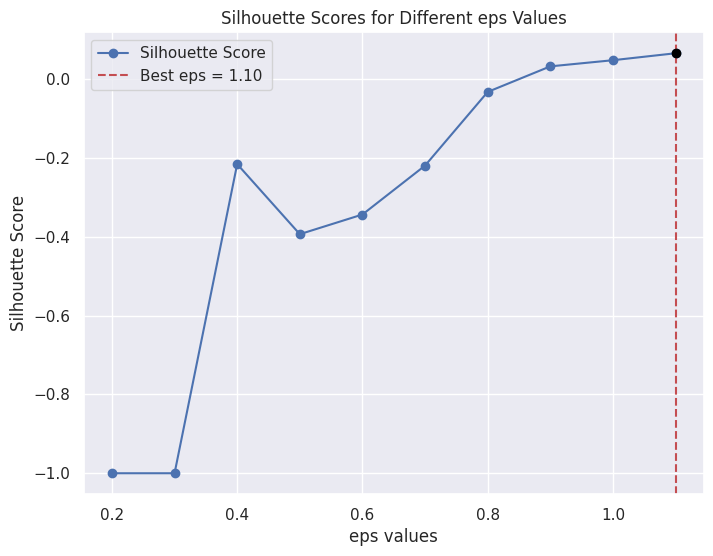

In [ ]:
# Plot the S-Scores

# Plot the Silhouette Scores for different eps values

plt.figure(figsize=(8, 6))

# Plot silhouette scores for each eps value

plt.plot(eps_values, s_scores, marker='o', label='Silhouette Score')

# Add labels and title
plt.title('Silhouette Scores for Different eps Values')
plt.xlabel('eps values')
plt.ylabel('Silhouette Score')
plt.grid(True)

# Highlight the best eps

best_eps_index = np.argmax(s_scores) # find the index of the best s_score
best_eps = eps_values[best_eps_index] # this will the best eps
best_s_score = s_scores[best_eps_index] # this will be the best s_score

plt.axvline(x = best_eps, color='r', linestyle='--', label = f'Best eps = {best_eps:.2f}')
plt.scatter(best_eps, best_s_score, color='black', zorder = 5)
plt.legend()
plt.show()

 Based on Silhouette Score, what is the best score based solely on the graph?

# 1.10

In [ ]:
# Define DBSCAN model

final_model = DBSCAN(eps = 2.884, min_samples = 8)

# Fit the model to the scaled dataset

db_scan_clusters = final_model.fit_predict(reduced_df.iloc[:,:2])

# Add the cluster labels to the scaled DataFrame

reduced_df['DBSCAN Cluster'] = db_scan_clusters
reduced_df.head(3)

,Feature_1,Feature_2,KMeans Cluster,DBSCAN Cluster
0,-9.619615,-0.910204,0,0
1,11.305911,-8.889836,1,0
2,0.567677,6.113420,0,0


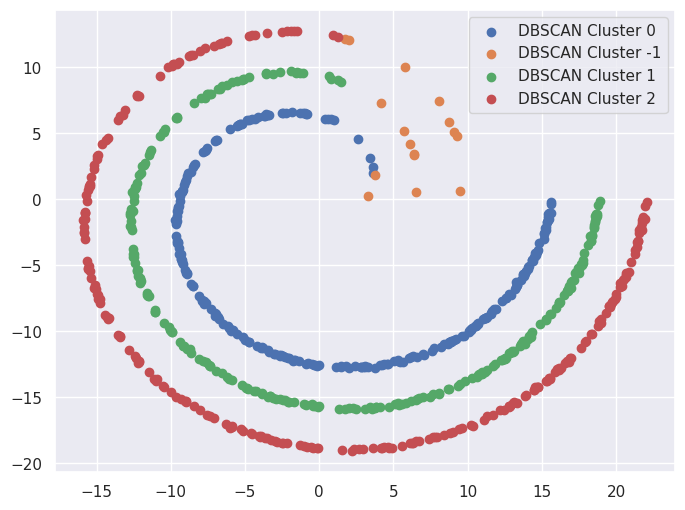

In [ ]:
# Plotting the clusters

plt.figure(figsize=(8,6))
unique_clusters = reduced_df['DBSCAN Cluster'].unique()

for cluster in unique_clusters:

    cluster_data = reduced_df[reduced_df['DBSCAN Cluster'] == cluster]

    plt.scatter(cluster_data['Feature_1'],
                cluster_data['Feature_2'],
                label=f'DBSCAN Cluster {cluster}', marker='o')

plt.legend()
plt.show()

Give me posible value of epsilon that can detect the spiral clusters with maximum outlier (-1) of 21 or less only
   Additional cluster of up to 1 will be allowed.

#   2.88

Give me posible value of min_samples that can detect the spiral clusters with maximum outlier (-1) of 21 less only
   Additional cluster of up to 1 will be allowed.

#   8